# Forecast for 1 year

### Add project path to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
import pandas as pd
def load_data(file_path):
    df =pd.read_csv(file_path)
    df['Date']=pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    
    return df
stoke_data=load_data("data/stoke_data.csv")

In [ ]:
#Load model and scalar


In [ ]:
from datetime import timedelta
import pandas as pd 
import numpy as np
import pickle
import joblib

model_path='models/TSLA-12-11-2024-11-33-54-00.pkl'
scaler_path='models/TSLA-scaler.joblib'
with open(model_path, 'rb') as file:
        model = pickle.load(file)
scaler = joblib.load(scaler_path)

def lstm_predict_future(data,ticker,model, scaler, predict_days):
    time_step=252
    last_data = data[[ticker]].values[-time_step:]
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))
    input_seq = last_data_scaled.reshape(1, time_step, 1)
    predictions = []
    current_date = pd.to_datetime(data.index[-1]) + timedelta(days=1)

    for _ in range(predict_days):
        predicted_price_scaled = model.predict(input_seq)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)[0][0]
        predictions.append((current_date, predicted_price))
        input_seq = np.append(input_seq[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        current_date += timedelta(days=1)
    prediction_df = pd.DataFrame(predictions, columns=['Date', f'{ticker}'])
    
    return prediction_df
TSLA_forecast=lstm_predict_future(stoke_data,'TSLA',model,scaler,365)

In [8]:
from datetime import timedelta
import pandas as pd 
import numpy as np
import pickle
import joblib

model_path = 'models/TSLA-12-11-2024-11-33-54-00.pkl'
scaler_path = 'models/TSLA-scaler.joblib'

# Load the model and scaler
with open(model_path, 'rb') as file:
    model = pickle.load(file)
scaler = joblib.load(scaler_path)

def lstm_predict_future(data, ticker, model, scaler, predict_days):
    time_step = 252  # Last 252 trading days
    last_data = data[[ticker]].values[-time_step:]  # Get the last 252 days of data
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))  # Scale the data
    input_seq = last_data_scaled.reshape(1, time_step, 1)  # Reshape for LSTM input
    predictions = []
    current_date = pd.to_datetime(data.index[-1]) + timedelta(days=1)  # Start date for prediction

    for _ in range(predict_days):
        predicted_price_scaled = model.predict(input_seq)  # Predict the next day's price
        predicted_price = scaler.inverse_transform(predicted_price_scaled)[0][0]  # Inverse scaling to get the actual price
        
        # Append the predicted value and date to the predictions list
        predictions.append((current_date, predicted_price))
        
        # Update the input sequence by removing the oldest value and adding the new prediction
        input_seq = np.append(input_seq[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        
        # Increment the current date by 1 day
        current_date += timedelta(days=1)

        # Update the last 365 days by appending the predicted value to the data
        # This ensures the model uses the last 365 days (including predictions) for the next forecast
        last_data = np.append(last_data, predicted_price)  # Add predicted value
        last_data = last_data[-time_step:]  # Keep only the last 365 days
        last_data_scaled = scaler.transform(last_data.reshape(-1, 1))  # Rescale new data
        input_seq = last_data_scaled.reshape(1, time_step, 1)  # Reshape for LSTM input

    prediction_df = pd.DataFrame(predictions, columns=['Date', f'{ticker}'])
    
    return prediction_df

# Example usage
TSLA_forecast = lstm_predict_future(stoke_data, 'TSLA', model, scaler, 365)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

In [9]:
TSLA_forecast.set_index('Date',inplace=True)

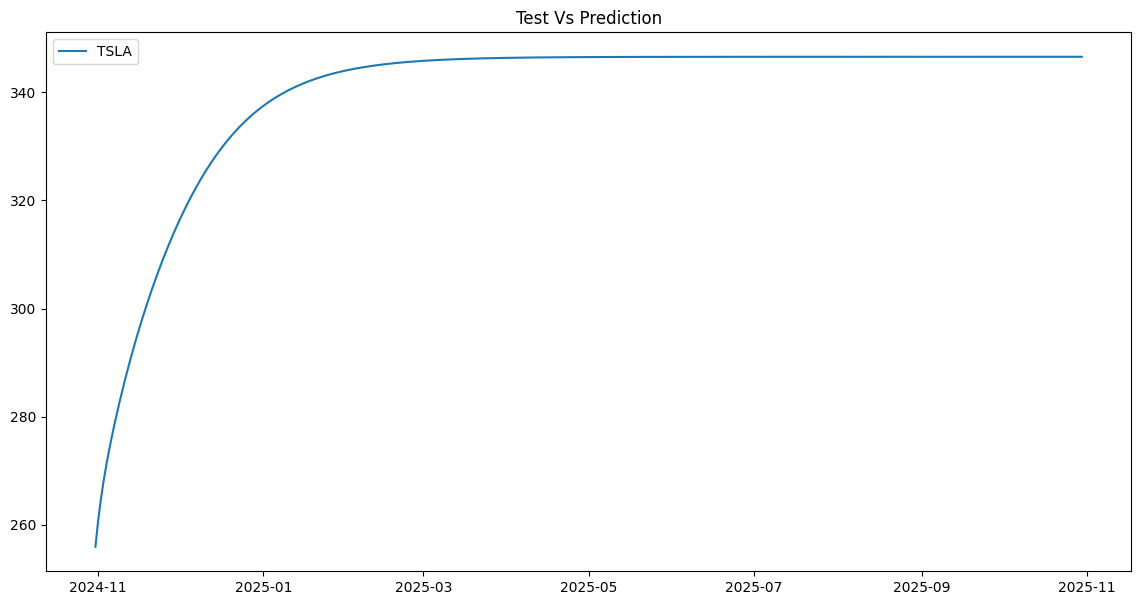

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(TSLA_forecast, label='TSLA')
# plt.plot(BND_forecast, label='BND')
# plt.plot(SPY_forecast, label='SPY')
# plt.plot(test, label='Test')
# plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.title(f"Test Vs Prediction")
plt.legend()
plt.show()

In [25]:
from datetime import timedelta
import pandas as pd 
import numpy as np

import pickle
import joblib

model_path='models/BND-12-11-2024-11-34-26-00.pkl'
scaler_path='models/BND-scaler.joblib'
with open(model_path, 'rb') as file:
        model = pickle.load(file)
scaler = joblib.load(scaler_path)

def lstm_predict_future(data,ticker,model, scaler,start_date, predict_days=30, time_step=60):
    last_data = data[[ticker]].values[-time_step:]
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))
    input_seq = last_data_scaled.reshape(1, time_step, 1)
    predictions = []
    current_date = pd.to_datetime(data.index[-1]) + timedelta(days=1)

    for _ in range(predict_days):
        predicted_price_scaled = model.predict(input_seq)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)[0][0]
        predictions.append((current_date, predicted_price))
        input_seq = np.append(input_seq[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        current_date += timedelta(days=1)
    prediction_df = pd.DataFrame(predictions, columns=['Date', f'{ticker}'])
    
    return prediction_df
BND_forecast=lstm_predict_future(stoke_data,'BND',model,scaler,'2024-12-31',365)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1

In [26]:
from datetime import timedelta
import pandas as pd 
import numpy as np

import pickle
import joblib

model_path='models/SPY-12-11-2024-11-35-02-00.pkl'
scaler_path='models/SPY-scaler.joblib'
with open(model_path, 'rb') as file:
        model = pickle.load(file)
scaler = joblib.load(scaler_path)

def lstm_predict_future(data,ticker,model, scaler,start_date, predict_days=30, time_step=60):
    last_data = data[[ticker]].values[-time_step:]
    last_data_scaled = scaler.transform(last_data.reshape(-1, 1))
    input_seq = last_data_scaled.reshape(1, time_step, 1)
    predictions = []
    current_date = pd.to_datetime(data.index[-1]) + timedelta(days=1)

    for _ in range(predict_days):
        predicted_price_scaled = model.predict(input_seq)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)[0][0]
        predictions.append((current_date, predicted_price))
        input_seq = np.append(input_seq[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        current_date += timedelta(days=1)
    prediction_df = pd.DataFrame(predictions, columns=['Date', f'{ticker}'])
    
    return prediction_df
SPY_forecast=lstm_predict_future(stoke_data,'SPY',model,scaler,'2024-12-31',365)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

In [18]:
TSLA_forecast

,Predicted Price
Date,
2024-10-31,255.911942
2024-11-01,260.691406
2024-11-02,264.634216
2024-11-03,267.998474
2024-11-04,270.966156
...,...
2025-10-26,346.607178
2025-10-27,346.607178
2025-10-28,346.607208


In [28]:
def merge(df1,df2,df3):
    # Set 'Date' as the index for each DataFrame
    # df1.set_index('Date', inplace=True)
    df2.set_index('Date', inplace=True)
    df3.set_index('Date', inplace=True)

    # Concatenate along the Date index, keeping only rows with matching indices
    merged_df = pd.concat([df1, df2, df3], axis=1, join='inner').reset_index()
    
    return merged_df
    
prediction=merge(TSLA_forecast,BND_forecast,SPY_forecast)

In [30]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   TSLA    365 non-null    float32       
 2   BND     365 non-null    float32       
 3   SPY     365 non-null    float32       
dtypes: datetime64[ns](1), float32(3)
memory usage: 7.3 KB


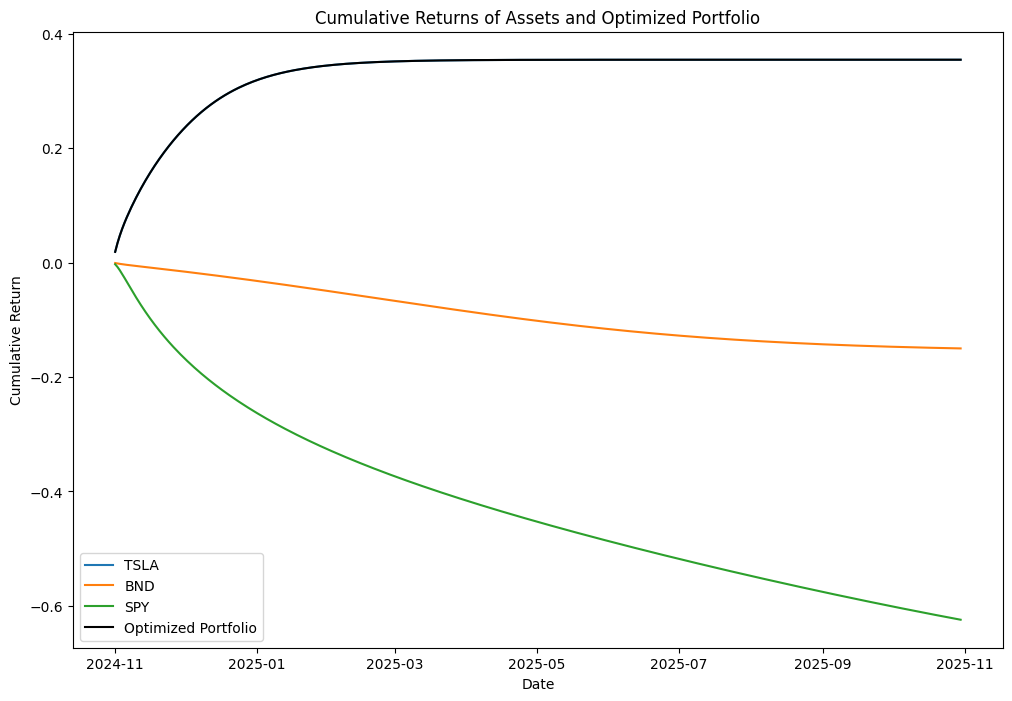

Optimal Portfolio Allocation:
TSLA: 1.00, BND: 0.00, SPY: 0.00
Expected Portfolio Return: 21.07%
Portfolio Volatility: 3.48%
Sharpe Ratio: 5.76
Value at Risk (95%) for TSLA: 0.00


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming `df` is the DataFrame with forecasted data for TSLA, BND, SPY
df=prediction
# 1. Calculate Daily and Annualized Returns
df.set_index('Date', inplace=True)  # Set 'Date' as index
daily_returns = df.pct_change().dropna()
annual_returns = daily_returns.mean() * 252  # 252 trading days

# 2. Calculate Covariance Matrix
cov_matrix = daily_returns.cov() * 252  # Annualized covariance

# 3. Define Portfolio Optimization Functions
def portfolio_performance(weights, returns, cov_matrix):
    # Calculate return and volatility of the portfolio
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.01):
    # Calculate the negative Sharpe Ratio for minimization
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

# Constraints: Weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: Each weight between 0 and 1
bounds = tuple((0, 1) for _ in range(3))

# Initial Guess (equal weighting)
initial_guess = [1/3, 1/3, 1/3]

# Optimization
optimal = minimize(negative_sharpe_ratio, initial_guess, args=(annual_returns, cov_matrix),
                   method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal.x

# 4. Portfolio Performance with Optimal Weights
opt_return, opt_volatility = portfolio_performance(optimal_weights, annual_returns, cov_matrix)
sharpe_ratio = (opt_return - 0.01) / opt_volatility  # Assuming 1% risk-free rate

# 5. Risk Analysis - Value at Risk (VaR) for TSLA
confidence_level = 0.95
z_score = np.percentile(daily_returns['TSLA'].dropna(), (1 - confidence_level) * 100)
value_at_risk_tsla = z_score * daily_returns['TSLA'].std() * np.sqrt(252)  # Annualized VaR

# 6. Visualization
# Plot cumulative returns for the portfolio and each asset
cumulative_returns = (1 + daily_returns).cumprod() - 1
portfolio_cumulative_returns = (cumulative_returns * optimal_weights).sum(axis=1)

plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns.index, cumulative_returns['TSLA'], label="TSLA")
plt.plot(cumulative_returns.index, cumulative_returns['BND'], label="BND")
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label="SPY")
plt.plot(cumulative_returns.index, portfolio_cumulative_returns, label="Optimized Portfolio", color='black')
plt.title("Cumulative Returns of Assets and Optimized Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# 7. Summary Output
print("Optimal Portfolio Allocation:")
print(f"TSLA: {optimal_weights[0]:.2f}, BND: {optimal_weights[1]:.2f}, SPY: {optimal_weights[2]:.2f}")
print(f"Expected Portfolio Return: {opt_return:.2%}")
print(f"Portfolio Volatility: {opt_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Value at Risk (95%) for TSLA: {value_at_risk_tsla:.2f}")


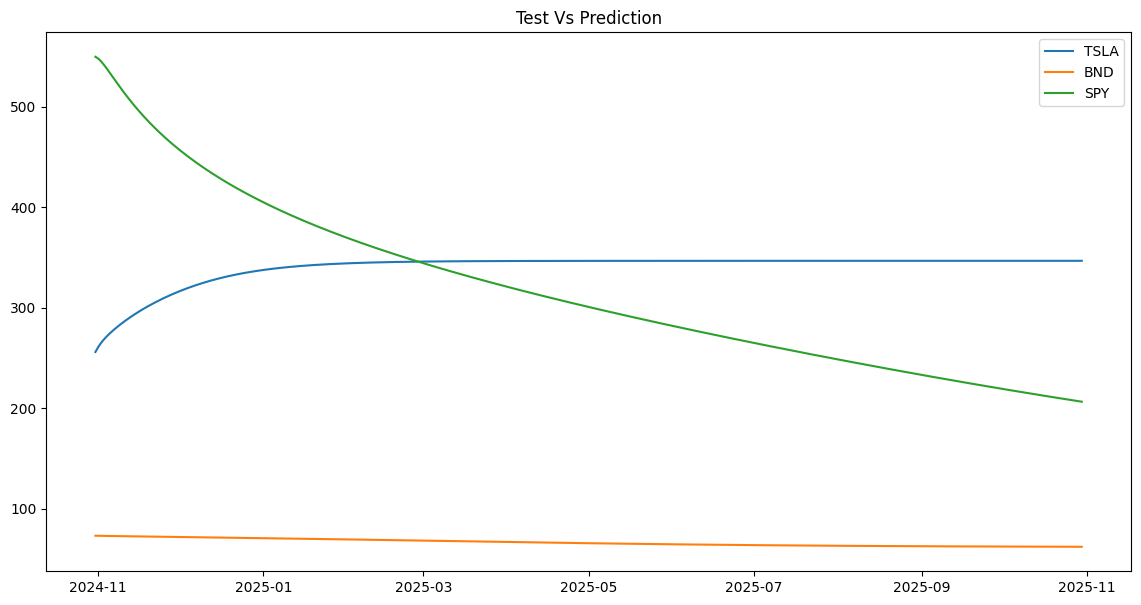

In [46]:
plt.figure(figsize=(14,7))
plt.plot(TSLA_forecast, label='TSLA')
plt.plot(BND_forecast, label='BND')
plt.plot(SPY_forecast, label='SPY')
# plt.plot(test, label='Test')
# plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.title(f"Test Vs Prediction")
plt.legend()
plt.show()

In [38]:
log_return = prediction.pct_change().apply(lambda x: np.log(1+x))
log_return.head()

,TSLA,BND,SPY
Date,,,
2024-10-31,NaN,NaN,NaN
2024-11-01,0.018504,-0.000896,-0.003088
2024-11-02,0.015011,-0.000771,-0.004777
2024-11-03,0.012633,-0.000682,-0.005864
2024-11-04,0.011013,-0.000618,-0.006539


In [39]:
variance=prediction.var()
variance

TSLA     267.979645
BND       12.187242
SPY     7242.238281
dtype: float32

In [40]:
prediction.describe()

,TSLA,BND,SPY
count,365.000000,365.000000,365.000000
mean,339.797699,66.529526,318.729309
std,16.370085,3.491023,85.101341
min,255.911942,62.226143,206.492905
25%,343.904266,63.235455,249.055450
50%,346.552643,65.764198,300.720001
75%,346.606171,69.635437,371.341949
max,346.607208,73.217430,549.515747


In [41]:
volalitility = np.sqrt(variance * 250)
volalitility

TSLA     258.833771
BND       55.197918
SPY     1345.570312
dtype: float32

<Axes: >

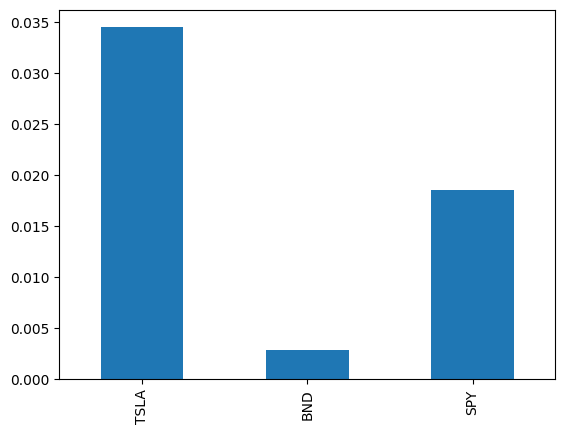

In [42]:
prediction.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [44]:
covariance=log_return.cov()
covariance

,TSLA,BND,SPY
TSLA,4.765638e-06,-9.514444e-08,-2.133483e-06
BND,-9.514444e-08,3.313729e-08,5.772294e-08
SPY,-2.133483e-06,5.772294e-08,1.372696e-06


In [53]:
# Define weights for allocation
w = [0.9, 0.0,0.0]
e_r_ind = log_return.mean()
e_r_ind

TSLA    0.000833
BND    -0.000447
SPY    -0.002689
dtype: float32

In [54]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

np.float64(0.0007500627252738923)

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

In [55]:
# Yearly returns for individual companies
ind_er = prediction.resample('Y').last().pct_change().mean()
ind_er

TSLA    0.028060
BND    -0.122297
SPY    -0.491557
dtype: float32

In [56]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = prediction.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

TSLA    0.034517
BND     0.002878
SPY     0.018525
dtype: float64

In [57]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
TSLA,0.028060,0.034517
BND,-0.122297,0.002878
SPY,-0.491557,0.018525


In [58]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
    
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,TSLA weight,BND weight,SPY weight
0,-0.096131,0.252654,0.525537,0.331334,0.143130
1,-0.117890,0.184793,0.406594,0.439782,0.153624
2,-0.115798,0.211660,0.462052,0.367406,0.170542
3,-0.238306,0.069984,0.204334,0.398298,0.397369
4,-0.214678,0.145148,0.420916,0.157514,0.421570


<Axes: xlabel='Volatility', ylabel='Returns'>

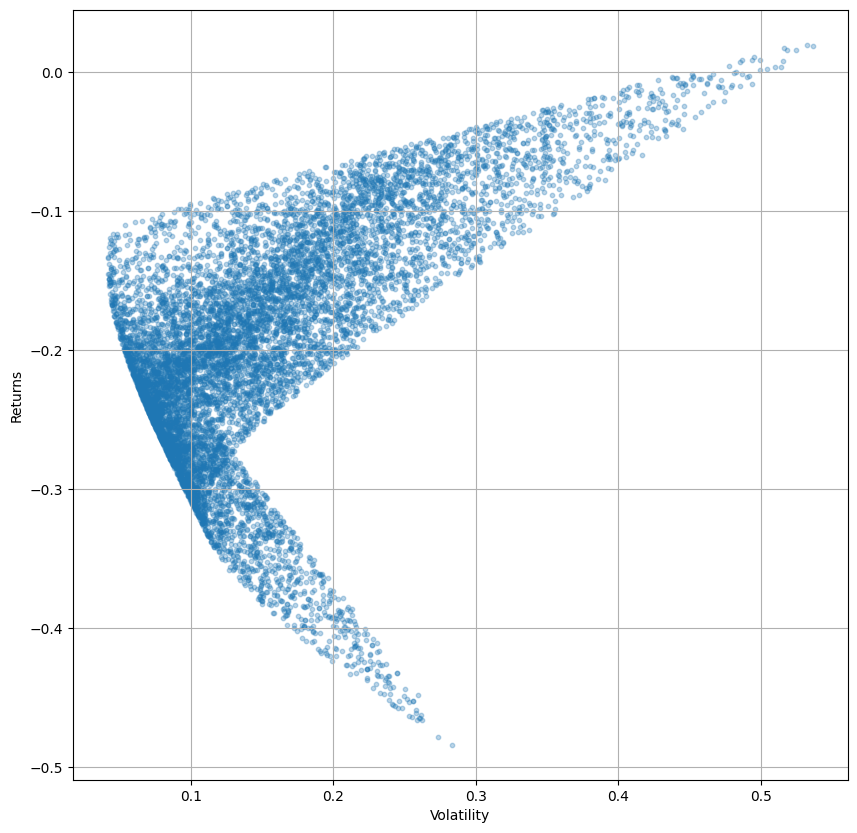

In [59]:
#  Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [60]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns       -0.132774
Volatility     0.042114
TSLA weight    0.047003
BND weight     0.905483
SPY weight     0.047514
Name: 7471, dtype: float64

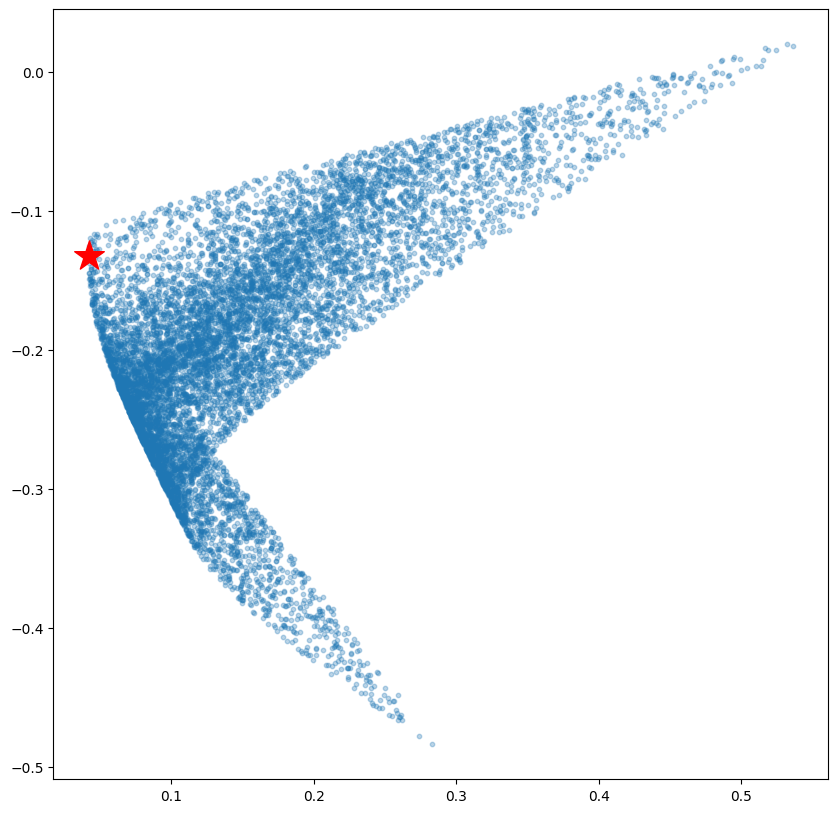

In [61]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [62]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.019713
Volatility     0.532097
TSLA weight    0.971070
BND weight     0.018106
SPY weight     0.010824
Name: 8657, dtype: float64

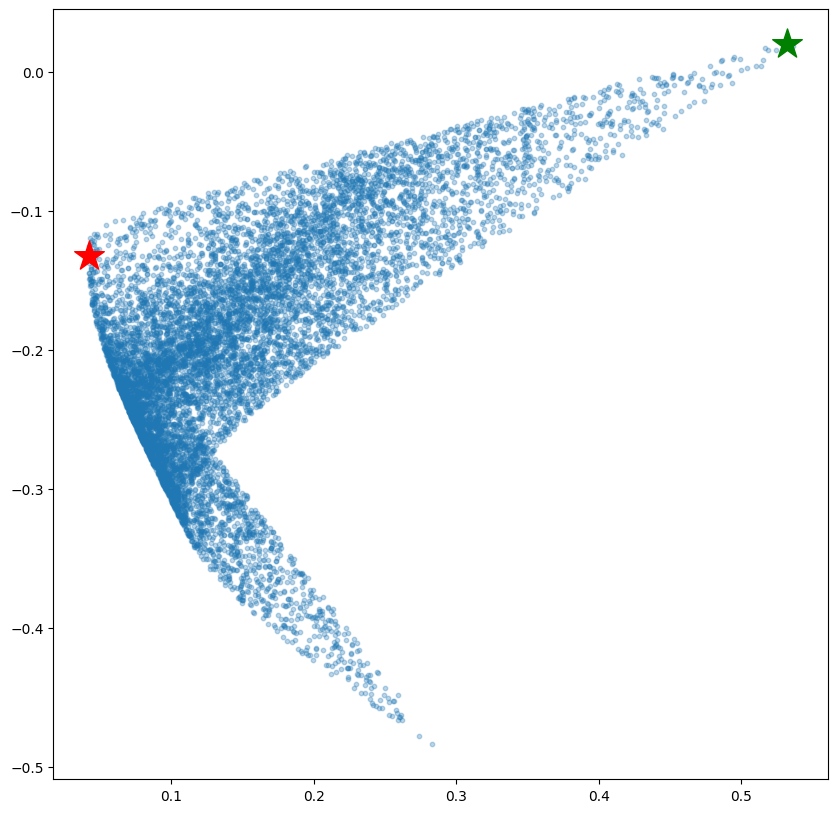

In [63]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)